1.Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States

# Hierarchical Method

In [38]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
from matplotlib import pyplot as plt

In [39]:
cr=pd.read_csv("crime_data.csv")

In [40]:
cr=cr.rename(columns={"Unnamed: 0":"States"})

In [41]:
cr.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [42]:
cr.shape

(50, 5)

# Check for Duplicate Values

In [43]:
cr[cr.duplicated()] # No Duplicate Records

,States,Murder,Assault,UrbanPop,Rape


In [44]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


# Check for Outliers

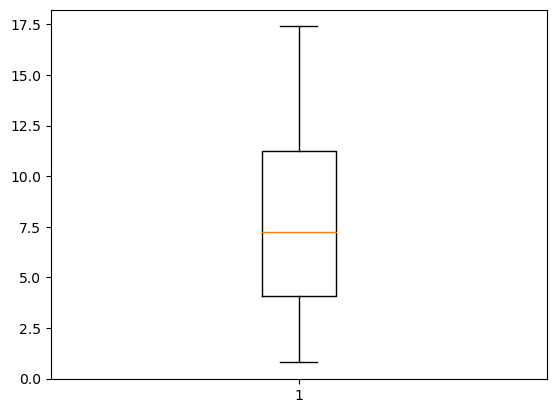

In [45]:
data_box=cr.dropna()
data_box1=data_box.Murder
plt.boxplot(data_box1)
plt.show()

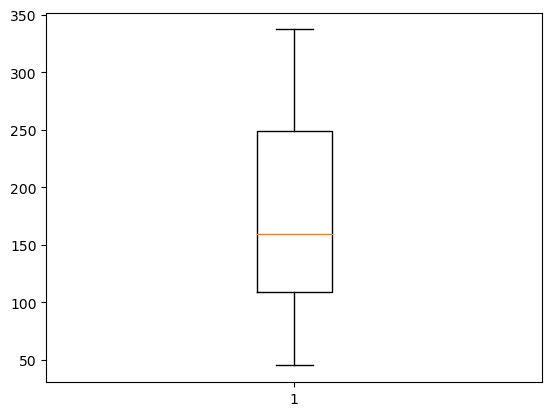

In [46]:
data_box=cr.dropna()
data_box1=data_box.Assault
plt.boxplot(data_box1)
plt.show()

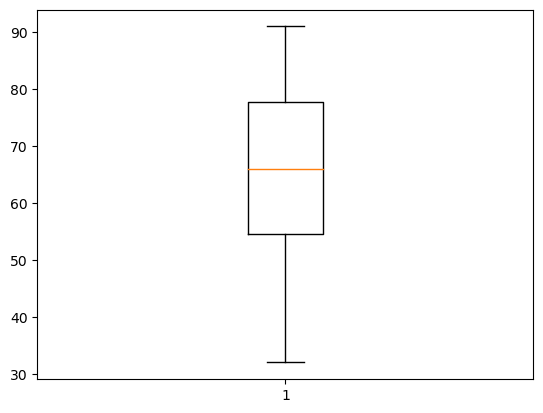

In [47]:
data_box=cr.dropna()
data_box1=data_box.UrbanPop
plt.boxplot(data_box1)
plt.show()

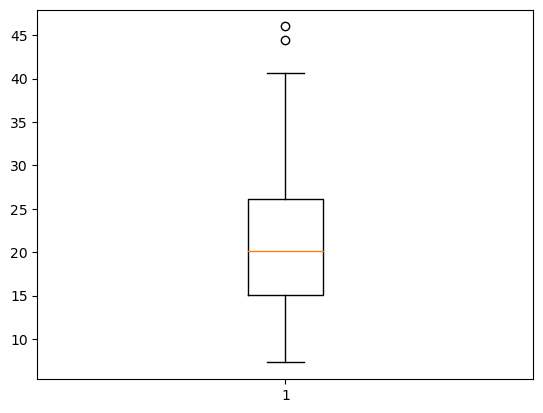

In [48]:
data_box=cr.dropna()
data_box1=data_box.Rape
plt.boxplot(data_box1)
plt.show()

In [49]:
cr.Rape.describe()

count    50.000000
mean     21.232000
std       9.366385
min       7.300000
25%      15.075000
50%      20.100000
75%      26.175000
max      46.000000
Name: Rape, dtype: float64

In [50]:
cr.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [51]:
 def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [6]:
df_norm=norm_func(cr.iloc[:,1:])

In [7]:
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [8]:
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')

In [9]:
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [10]:
cr['h_clusterid'] = Clusters

In [11]:
cr.sort_values("h_clusterid")

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,0
42,Texas,12.7,201,80,25.5,0
41,Tennessee,13.2,188,59,26.9,0
39,South Carolina,14.4,279,48,22.5,0
32,North Carolina,13.0,337,45,16.1,0
31,New York,11.1,254,86,26.1,0
30,New Mexico,11.4,285,70,32.1,0
27,Nevada,12.2,252,81,46.0,0
23,Mississippi,16.1,259,44,17.1,0
21,Michigan,12.1,255,74,35.1,0


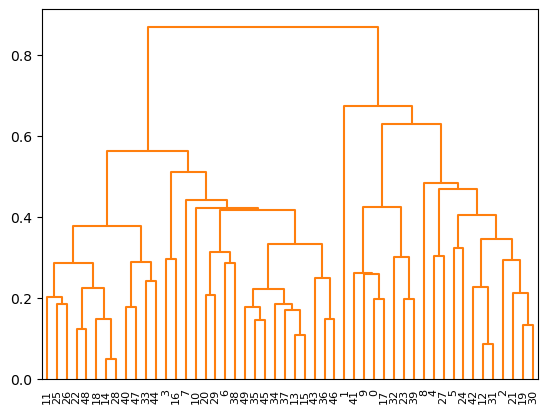

In [12]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='average'),color_threshold=1.0)

In [13]:
cr.groupby('h_clusterid').agg(['mean'])

C:\Users\thila\AppData\Local\Temp\ipykernel_1520\1254393888.py:1: FutureWarning: ['Unnamed: 0'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  cr.groupby('h_clusterid').agg(['mean'])


,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
h_clusterid,,,,
0,12.165,255.25,68.4,29.165
1,5.715,132.30,70.8,18.100
2,3.180,78.70,49.3,11.630


In [14]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import pandas as pd

In [15]:
ewa=pd.read_excel("EastWestAirlines.xlsx",sheet_name=1)

In [16]:
ewa

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [17]:
 def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [18]:
df_norm=norm_func(ewa.iloc[:,1:])

In [19]:
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [20]:
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')

In [21]:
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [22]:
ewa['h_clusterid'] = Clusters

In [23]:
ewa.sort_values("h_clusterid")

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
1999,2016,327126,1452,5,1,1,97997,25,350,3,4440,1,0
3162,3184,103203,0,1,1,1,3200,4,200,2,1556,1,0
3165,3187,194816,0,1,1,1,20822,25,6647,12,2424,1,0
3167,3189,17863,0,1,1,1,0,0,0,0,2028,1,0
1505,1520,391222,0,3,1,1,27471,20,1600,7,4905,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1762,1778,1703,0,1,1,1,1230,4,0,0,4390,0,2
1764,1780,70518,0,1,1,1,2000,3,1000,2,4450,0,2
1768,1784,99336,0,3,1,1,14195,14,500,1,4453,0,2
1770,1786,38918,0,1,1,1,6505,29,618,2,4442,0,2


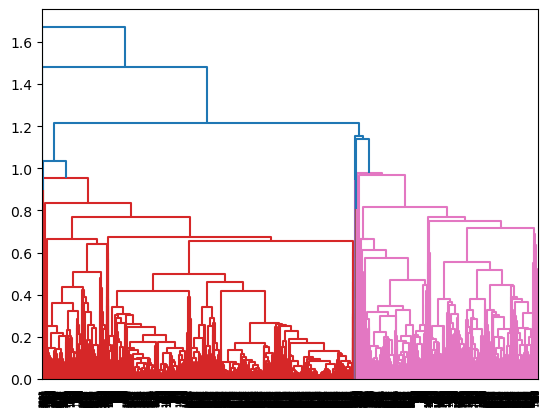

In [25]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='average'),color_threshold=1.0)

In [ ]:
cr.groupby('h_clusterid').agg(['mean'])